In [267]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [268]:
torch.__version__

'2.0.1'

In [269]:
data = pd.read_csv("D:\CODE\jupyter notebook\data\(日月光华)PyTorch深度学习教程课件\(日月光华)PyTorch深度学习教程课件\income.csv")
data.head()

,Unnamed: 0,Unnamed: 1,Education,Income
0,0,1,10.000000,26.658839
1,1,2,10.401338,27.306435
2,2,3,10.842809,22.132410
3,3,4,11.244147,21.169841
4,4,5,11.645485,15.192634


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Unnamed: 1  30 non-null     int64  
 2   Education   30 non-null     float64
 3   Income      30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


Text(0, 0.5, 'Income')

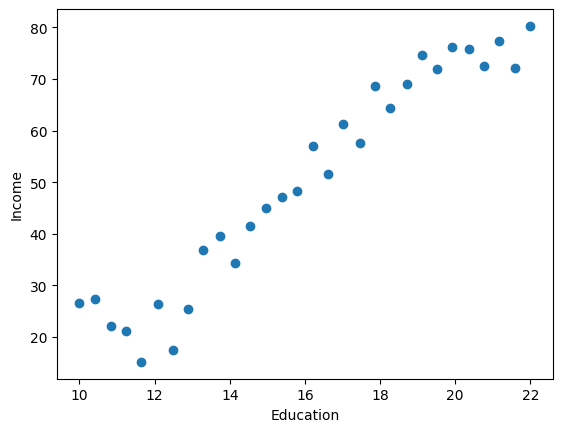

In [271]:
plt.scatter(data.Education, data.Income)                 #括号里为x轴y轴
plt.xlabel('Education')
plt.ylabel('Income')

In [272]:
data.Education.values

array([10.      , 10.401338, 10.842809, 11.244147, 11.645485, 12.086957,
       12.488294, 12.889632, 13.29097 , 13.732441, 14.133779, 14.535117,
       14.976589, 15.377926, 15.779264, 16.220736, 16.622074, 17.023411,
       17.464883, 17.866221, 18.267559, 18.70903 , 19.110368, 19.511706,
       19.913043, 20.354515, 20.755853, 21.157191, 21.598662, 22.      ])

In [273]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)

In [274]:
X.shape

torch.Size([30, 1])

In [275]:
class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [276]:
# 初始化模型
model = EIModel()
# 选择损失函数
loss_fn = nn.MSELoss()
# 优化器
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

In [277]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        # 梯度清零
        opt.zero_grad()
        loss.backward()
        opt.step()

In [278]:
print(list(model.named_parameters()))
print(loss.item())

[('linear.weight', Parameter containing:
tensor([[4.9624]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-28.1445], requires_grad=True))]
0.7217453718185425
